In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [15]:
data = pd.read_csv(r"Advertising.csv")
print()
print(data)
print(data.columns)


     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


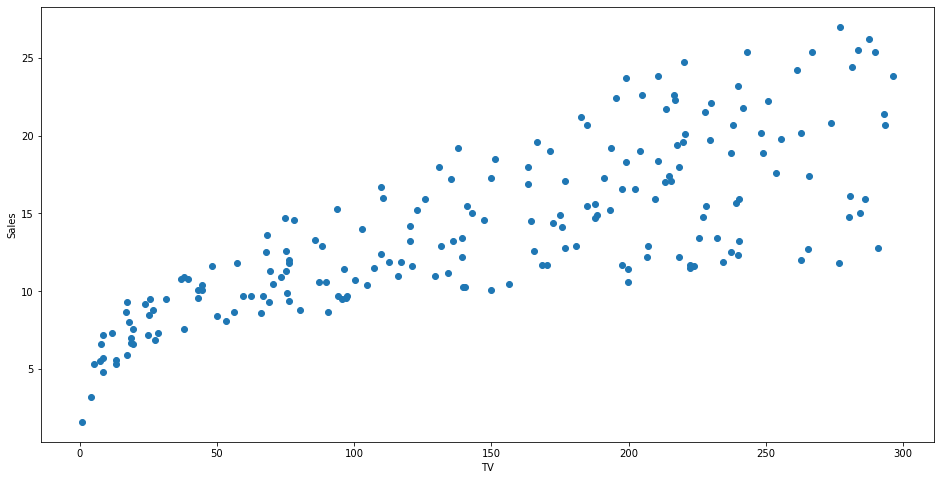

In [16]:
data.columns
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales']
)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [17]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(X_train, y_train)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


LinearRegression()

In [18]:
print(reg.coef_[0][0])
print(reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.045814342171896234
7.31081016541168
The linear model is: Y = 7.3108 + 0.045814X


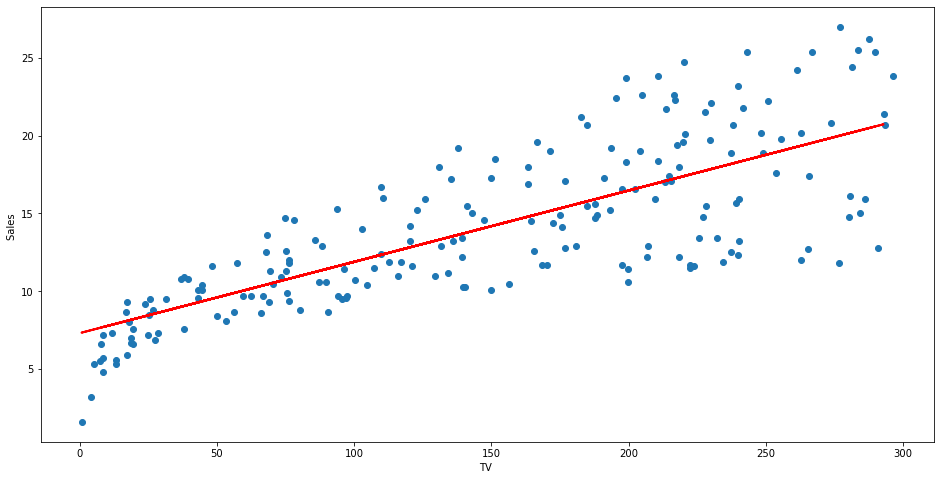

In [10]:
predictions = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(
data['TV'],
data['sales']
)
plt.plot(
X_test,
predictions,
linewidth=2,
color='red'
)
plt.xlabel("TV ")
plt.ylabel("Sales ")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


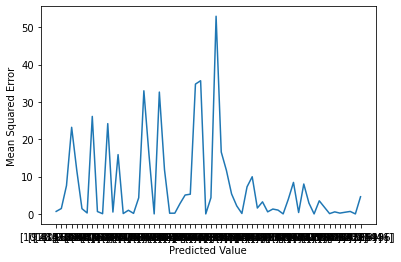

In [11]:
errors = list()
for i in range(len(y_test)):
    err= (y_test[i] - predictions[i])**2
# store error
    errors.append(err)
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predictions)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [12]:
print('Train Score :', reg.score(X_train,y_train))
print('Test Score:', reg.score(X_test,y_test))

Train Score : 0.5552336104251212
Test Score: 0.725606346597073


In [13]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE : 7.497479593464674
RMSE : 2.7381525876883988
